In [227]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [228]:
iris = datasets.load_iris()

In [229]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [230]:
X['target'] = iris.target

In [231]:
X = X.drop(X[X['target'] == 0].index)
X.reset_index(inplace=True)
X = X.drop(['index'],axis=1)
X['target'] = X['target'] - 1
Y = X['target']
X = X.drop(['target'],axis=1)

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
sc = StandardScaler()

In [234]:
X=sc.fit_transform(X)

In [235]:
params = np.random.normal(size=(5,))
params

array([-0.67299592,  0.67288638, -1.01751979, -0.15948077,  0.23531439])

In [236]:
LEARNING_RATE = 0.0001
precision = 0.0001
l_old = 0
l_new = 2
while np.abs(l_new -l_old) > precision:
    l_old = l_new
    Ht = params[0]+params[1]*X[:,0]+params[2]*X[:,1]+params[3]*X[:,2]+params[4]*X[:,3]
    Y_pred = 1/(1+np.exp(-Ht))
    l_new = - np.sum((Y * np.log(Y_pred)) + ((1. - Y) * np.log(1. - Y_pred)))
    params[0] -= LEARNING_RATE * np.sum((1-Y)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) - (Y*np.exp(-Ht))/(np.exp(-Ht)+1))
    params[1] -= LEARNING_RATE * np.sum(X[:,0]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1)- (X[:,0]*(Y-1)*np.exp(-Ht))/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))))
    params[2] -= LEARNING_RATE * np.sum(X[:,1]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,1]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    params[3] -= LEARNING_RATE * np.sum(X[:,2]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,2]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    params[4] -= LEARNING_RATE * np.sum(X[:,3]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,3]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
print(l_new, l_old)

22.486529984701654 22.486598461331752


In [237]:
params

array([-0.31720568,  1.87651888, -0.26734553,  1.75546082,  2.25180918])

In [238]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y_pred')

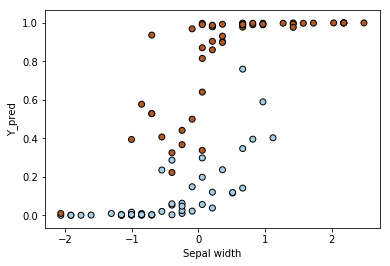

In [239]:
plt.scatter(X[:,0], Y_pred, c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal width')
plt.ylabel('Y_pred')

Метод Нестерова

In [240]:
params = np.random.normal(size=(5,))
params

array([-1.71106206,  1.24930218,  0.16744969, -0.90893178, -1.04629704])

In [241]:
LEARNING_RATE = 0.0001
precision = 0.0001
l_old = 0
l_new = 2
gamma = 0.9

while np.abs(l_new -l_old) > precision:
    l_old = l_new
    Ht = params[0]+params[1]*X[:,0]+params[2]*X[:,1]+params[3]*X[:,2]+params[4]*X[:,3]
    Y_pred = 1/(1+np.exp(-Ht))
    l_new = - np.sum((Y * np.log(Y_pred)) + ((1. - Y) * np.log(1. - Y_pred)))
    v0 = gamma*params[0] + LEARNING_RATE * np.sum((1-Y)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) - (Y*np.exp(-Ht))/(np.exp(-Ht)+1))
    params[0] -= v0
    v1 = gamma*params[1] + LEARNING_RATE * np.sum(X[:,0]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1)- (X[:,0]*(Y-1)*np.exp(-Ht))/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))))
    params[1] -= v1
    v2 = gamma*params[2] + LEARNING_RATE * np.sum(X[:,1]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,1]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    params[2] -= v2
    v3 = gamma*params[3] + LEARNING_RATE * np.sum(X[:,2]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,2]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    params[3] -= v3
    v4 = gamma*params[4] + LEARNING_RATE * np.sum(X[:,3]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,3]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    params[4] -= v4
print(l_new, l_old)

68.85994940947126 68.85999069119346


In [242]:
params

array([-1.40737276e-08,  2.74615093e-03,  1.71155600e-03,  4.36901115e-03,
        4.60070770e-03])

Text(0, 0.5, 'Y_pred')

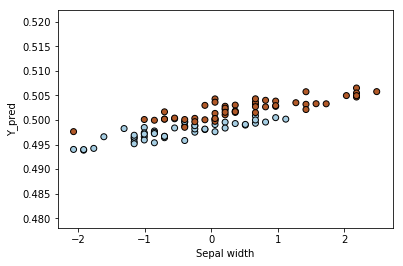

In [243]:
plt.scatter(X[:,0], Y_pred, c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal width')
plt.ylabel('Y_pred')

Методом rmsprop

In [244]:
params = np.random.normal(size=(5,))
params

array([-1.07050997,  2.42375695, -0.28675238, -1.21156644, -1.14438522])

In [245]:
LEARNING_RATE = 0.0001
precision = 0.0001
l_old = 0
l_new = 2
gamma = 0.9
eps = 0.0000001
E = [0,0,0,0,0]

while np.abs(l_new - l_old) > precision:
    l_old = l_new
    Ht = params[0]+params[1]*X[:,0]+params[2]*X[:,1]+params[3]*X[:,2]+params[4]*X[:,3]
    Y_pred = 1/(1+np.exp(-Ht))
    l_new = - np.sum((Y * np.log(Y_pred)) + ((1. - Y) * np.log(1. - Y_pred)))
    g0 = np.sum((1-Y)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) - (Y*np.exp(-Ht))/(np.exp(-Ht)+1))
    E[0] = gamma*E[0] + (1-gamma)*np.square(g0)
    params[0] -= LEARNING_RATE/np.sqrt(E[0]+eps)*g0
    g1 = np.sum(X[:,0]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1)- (X[:,0]*(Y-1)*np.exp(-Ht))/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1)))) 
    E[1] = gamma*E[1] + (1-gamma)*np.square(g1)
    params[1] -= LEARNING_RATE/np.sqrt(E[1]+eps)*g1
    g2 = np.sum(X[:,1]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,1]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    E[2] = gamma*E[2] + (1-gamma)*np.square(g2)
    params[2] -= LEARNING_RATE/np.sqrt(E[2]+eps)*g2
    g3 = np.sum(X[:,2]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,2]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    E[3] = gamma*E[3] + (1-gamma)*np.square(g3)
    params[3] -= LEARNING_RATE/np.sqrt(E[3]+eps)*g3
    g4 = np.sum(X[:,3]*(1-Y)*np.exp(-Ht)/(np.exp(-Ht)+1) - X[:,3]*(Y-1)*np.exp(-Ht)/(np.square(np.exp(-Ht)+1)*(1-1/(np.exp(-Ht)+1))) )
    E[4] = gamma*E[4] + (1-gamma)*np.square(g4)
    params[4] -= LEARNING_RATE/np.sqrt(E[4]+eps)*g4

print(l_new, l_old)

77.90553557217602 77.90563545359625


In [249]:
params

array([0.13713793, 3.65997112, 0.94946179, 0.02464773, 0.09182895])

Text(0, 0.5, 'Y_pred')

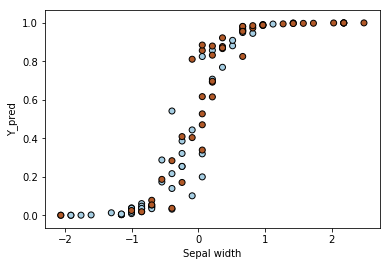

In [247]:
plt.scatter(X[:,0], Y_pred, c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal width')
plt.ylabel('Y_pred')